# Model Training

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn import svm

import os, json, sklearn, keras

# Load Data

In [29]:
with open('numericLabels.json') as f:
    numericLabels = json.load(f)

In [30]:
data = pd.read_csv('completeDataSchmierLuefterFilamOnly.csv',index_col=0,header=[0,1])

In [31]:
((data['label']>0)*1).describe()

,0
count,2112.000000
mean,0.500000
std,0.500118
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


# Split x,y,test,train

In [32]:
result = data.iloc[[count for count, _ in enumerate(data['label']) if count != 0]]
filt = data.label != 0
data['label']=(data['label']>=1)*1
numInputs = len(data.columns)-1
y = data['label']
x = data.drop(['label'], level=0,axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

x.describe()

mfcc__01411riemen                                                      \
                      0            1            2            3            4   
count       2112.000000  2112.000000  2112.000000  2112.000000  2112.000000   
mean           0.199131     0.177811     0.183231     0.184432     0.162540   
std            0.064254     0.057732     0.060081     0.060707     0.056112   
min            0.000000     0.000000     0.000000     0.000000     0.000000   
25%            0.145705     0.134663     0.138259     0.141214     0.122434   
50%            0.200634     0.172321     0.178298     0.179787     0.154957   
75%            0.236357     0.208111     0.218792     0.219504     0.194662   
max            0.441394     0.395374     0.406071     0.429572     0.371541   

                                                                        \
                 5            6            7            8            9   
count  2112.000000  2112.000000  2112.000000  2112.000000  2112.000000   
mean      0.135417     0.134149     0.129355     0.101557     0.074074   
std       0.052098     0.047529     0.041667     0.037848     0.035254   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.097652     0.100820     0.101046     0.076844     0.050467   
50%       0.122263     0.121661     0.120828     0.091306     0.059887   
75%       0.165725     0.164704     0.155373     0.121751     0.093680   
max       0.348040     0.318696     0.266378     0.227800     0.216535   

           ...       mfcc__08DPA2                                         \
           ...                  9           10           11           12   
count      ...        2112.000000  2112.000000  2112.000000  2112.000000   
mean       ...           0.022890     0.008528     0.010046    -0.004013   
std        ...           0.011740     0.011366     0.011885     0.010917   
min        ...          -0.003412    -0.020701    -0.020433    -0.034928   
25%        ...           0.015774     0.001342     0.002481    -0.010990   
50%        ...           0.021302     0.007127     0.009440    -0.004812   
75%        ...           0.027938     0.013642     0.016086     0.001525   
max        ...           0.084200     0.065239     0.062307     0.044264   

                                 s_centroid__08DPA2 rmse__08DPA2 s_bw__08DPA2  \
                13            14                  0            0            0   
count  2112.000000  2.112000e+03        2112.000000  2112.000000  2112.000000   
mean      0.009074 -3.481023e-07           0.101315     0.760562     0.110123   
std       0.010403  1.113529e-02           0.012755     0.261109     0.012571   
min      -0.019037 -2.925572e-02           0.000000     0.000000     0.000000   
25%       0.002519 -6.653282e-03           0.098620     0.641979     0.109173   
50%       0.008340 -2.744602e-04           0.102890     0.691265     0.111623   
75%       0.014604  5.695588e-03           0.106757     0.778419     0.113762   
max       0.052914  4.692718e-02           0.121958     2.150612     0.121991   

      s_roll__08DPA2  
                   0  
count    2112.000000  
mean        0.274424  
std         0.035965  
min         0.000000  
25%         0.274380  
50%         0.282988  
75%         0.289352  
max         0.309876  

[8 rows x 152 columns]

# Support Vector Machine

In [33]:
clf = svm.SVC()
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print(score)

/root/miniconda2/envs/findRefrain3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.767045454545


In [34]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

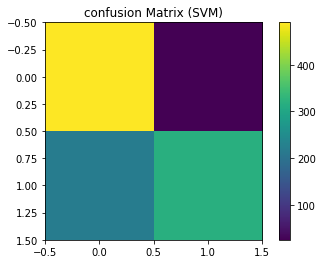

In [35]:
plt.imshow(cm)
plt.colorbar()
plt.title('confusion Matrix (SVM)')
plt.show()

In [36]:
fpr_clf, tpr_clf, thresholds_clf = sklearn.metrics.roc_curve(y_test, y_pred)

## Feature Selection

In [37]:
minx = x.min().min()
maxx = x.max().max()
scalex = maxx-minx

np.save('minVal',minx)
np.save('scaleFactorVal',scalex)


X_train_n = (X_train-minx)/scalex
X_test_n = (X_test-minx)/scalex

In [38]:
X_train_n.describe()

mfcc__01411riemen                                                      \
                      0            1            2            3            4   
count       1056.000000  1056.000000  1056.000000  1056.000000  1056.000000   
mean           0.088039     0.082234     0.083714     0.084069     0.078125   
std            0.016972     0.015196     0.015855     0.016030     0.014848   
min            0.034203     0.034203     0.034203     0.034203     0.034203   
25%            0.073609     0.070486     0.071678     0.072763     0.067391   
50%            0.088555     0.080947     0.082516     0.082966     0.076190   
75%            0.098022     0.089643     0.093216     0.093514     0.086426   
max            0.147014     0.141276     0.144173     0.150537     0.131864   

                                                                        \
                 5            6            7            8            9   
count  1056.000000  1056.000000  1056.000000  1056.000000  1056.000000   
mean      0.070800     0.070457     0.069076     0.061546     0.054129   
std       0.013885     0.012643     0.010931     0.009965     0.009385   
min       0.034203     0.034203     0.034203     0.034203     0.034203   
25%       0.060681     0.061360     0.061827     0.055134     0.047883   
50%       0.067177     0.067159     0.066633     0.058781     0.050452   
75%       0.078015     0.078137     0.075425     0.066587     0.059440   
max       0.123276     0.120510     0.105283     0.094890     0.092844   

           ...       mfcc__08DPA2                                         \
           ...                  9           10           11           12   
count      ...        1056.000000  1056.000000  1056.000000  1056.000000   
mean       ...           0.040275     0.036397     0.036805     0.033046   
std        ...           0.003042     0.002978     0.003151     0.002910   
min        ...           0.033731     0.028597     0.028669     0.025453   
25%        ...           0.038444     0.034490     0.034871     0.031223   
50%        ...           0.039887     0.036092     0.036590     0.032749   
75%        ...           0.041695     0.037749     0.038403     0.034541   
max        ...           0.056978     0.051870     0.050372     0.045288   

                                s_centroid__08DPA2 rmse__08DPA2 s_bw__08DPA2  \
                13           14                  0            0            0   
count  1056.000000  1056.000000        1056.000000  1056.000000  1056.000000   
mean      0.036597     0.034106           0.061755     0.236669     0.064106   
std       0.002754     0.002928           0.003186     0.063845     0.003081   
min       0.029603     0.026380           0.034203     0.034203     0.034203   
25%       0.034857     0.032334           0.060931     0.207353     0.063768   
50%       0.036336     0.034010           0.062133     0.220145     0.064420   
75%       0.038069     0.035667           0.063153     0.242153     0.065010   
max       0.047472     0.045423           0.067184     0.582540     0.067193   

      s_roll__08DPA2  
                   0  
count    1056.000000  
mean        0.108803  
std         0.009025  
min         0.034203  
25%         0.108631  
50%         0.110916  
75%         0.112628  
max         0.118122  

[8 rows x 152 columns]

In [39]:
scores = sklearn.feature_selection.chi2(X_train_n, y_train)

In [40]:
labs = X_train_n.columns.labels[0]
names = X_train_n.columns.levels[0]

featLabelList = []
for i in range(len(labs)):
    featLabelList.append(names[labs[i]])



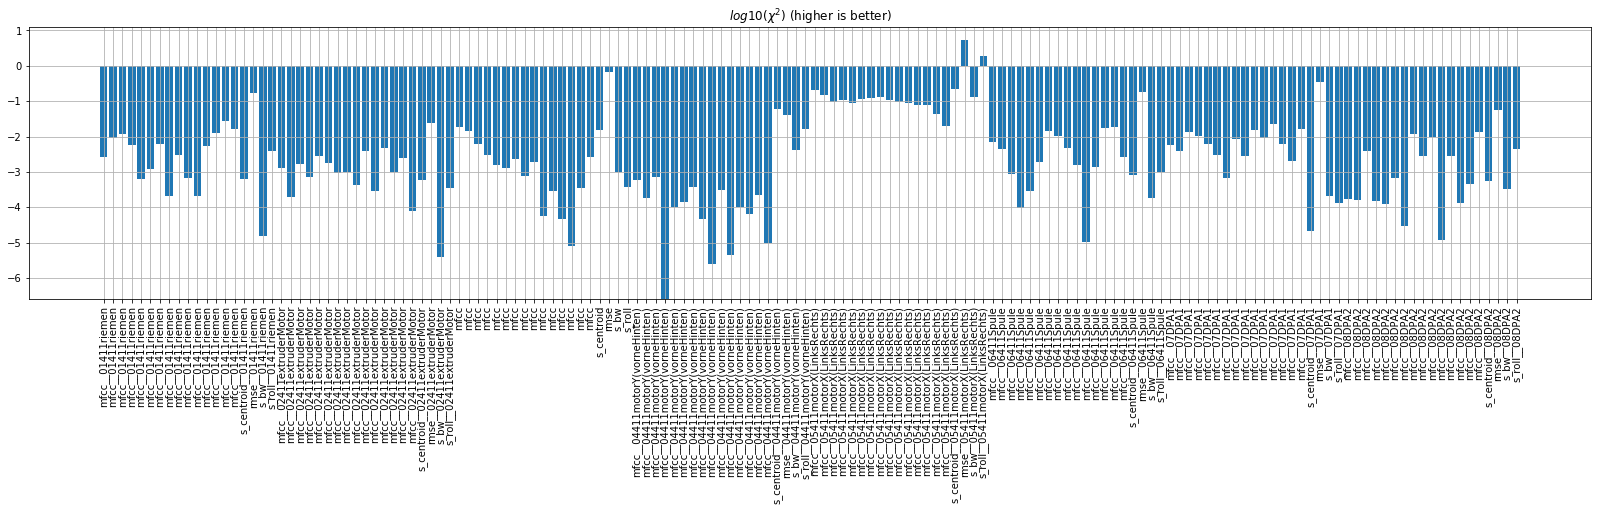

In [41]:
plt.figure(figsize=[28,5])
plt.bar(np.arange(len(scores[0])),np.log10(scores[0]))
plt.xticks(np.arange(len(featLabelList)), featLabelList, rotation='vertical')
plt.title('$log10(\chi^{2})$ (higher is better)')
plt.grid()
plt.show()

In [42]:
sortedFeatLabelList = [x for _,x in sorted(zip(scores[0],featLabelList))]
sortedScores = sorted(scores[0])

In [43]:
Nfeatures = 15

In [44]:
fselector = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=Nfeatures,)
x_train_reduced = fselector.fit_transform(X_train_n, y_train)
mask = fselector.get_support()
x_test_reduced = np.array(X_test_n)[:,mask.ravel()]

In [45]:
np.save('featuremask', mask)

# Selected Features

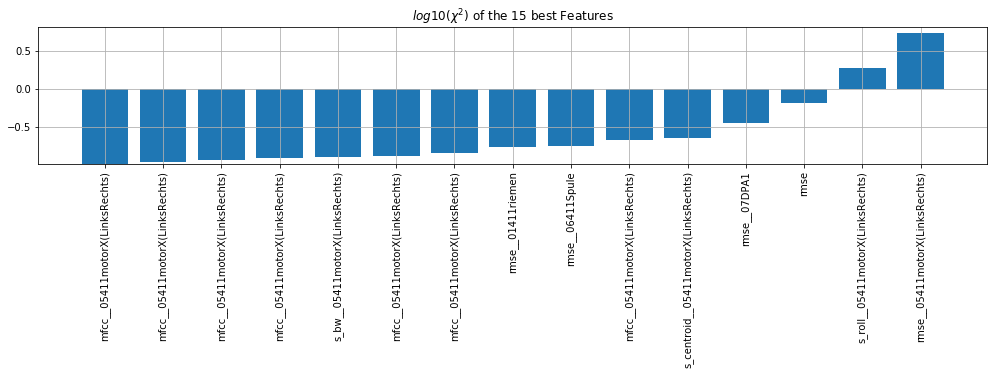

In [48]:
shortLabs = sortedFeatLabelList[-Nfeatures:]
shortScores = sortedScores[-Nfeatures:]
plt.figure(figsize=[17,5])
plt.bar(np.arange(len(shortScores)),np.log10(shortScores))
plt.xticks(np.arange(len(shortLabs)), shortLabs, rotation='vertical')
plt.title('$log10(\chi^{2})$ of the 15 best Features')
plt.grid()
plt.gcf().subplots_adjust(bottom=0.5)
plt.savefig('bestFeatures')
plt.show()

# Neural Network
## Construction

In [22]:
from keras import regularizers

In [23]:
numInputs = x_train_reduced.shape[1]
m = keras.models.Sequential()
m.add(Dense(numInputs,input_shape=(numInputs,),kernel_regularizer=regularizers.l1(0.0001),activity_regularizer=regularizers.l1(0.0)))
m.add(keras.layers.Dropout(0.1, noise_shape=None, seed=42))
m.add(Dense(numInputs//2,activation='sigmoid',kernel_regularizer=regularizers.l1(0.001),activity_regularizer=regularizers.l1(0.0)))
m.add(keras.layers.Dropout(0.05, noise_shape=None, seed=27))
m.add(Dense(1, activation='sigmoid'))


In [24]:
keras.utils.plot_model(m,to_file='model.png',show_shapes=True,)

![bla](model.png)

In [25]:
m.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],)

In [26]:
y_train_arr = np.array(y_train).flatten()
y_train_arr = to_categorical(y_train_arr)
y_train_enc = np.argmax(y_train_arr,axis=1)

y_test_arr = np.array(y_test).flatten()
y_test_arr = to_categorical(y_test_arr)
y_test_enc = np.argmax(y_test_arr,axis=1)

In [27]:
x_train_arr = np.array(x_train_reduced)
x_test_arr = np.array(X_test)
# xArr.shape

## Training

In [28]:
history = m.fit(x_train_arr,y_train_enc,batch_size=2**18,validation_split=0.3,epochs=50000,verbose=0)

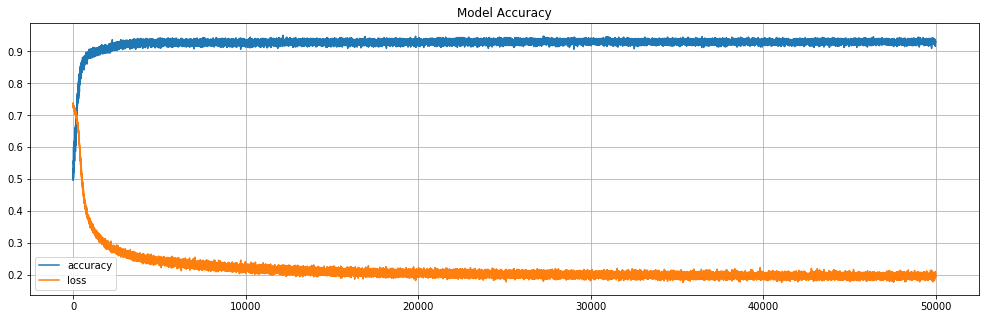

In [29]:
plt.figure(figsize=[17,5])
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('Model Accuracy')
plt.grid()
plt.legend()
plt.show()

## Evaluation

In [30]:
m.evaluate(x_test_reduced,y_test_enc)

1056/1056 [==============================] - 0s 47us/step


[0.18927567610234924, 0.93465909090909094]

In [31]:
y_pred = m.predict(x_test_reduced)

In [32]:
fpr_keras, tpr_keras, thresholds_keras = sklearn.metrics.roc_curve(y_test_enc, y_pred)

In [33]:
auc_keras = sklearn.metrics.auc(fpr_keras, tpr_keras)

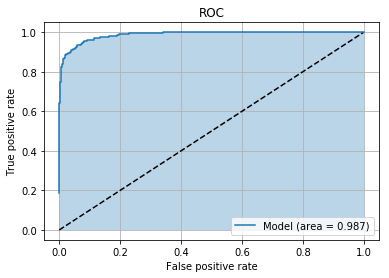

In [42]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Model (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.fill_between(fpr_keras,tpr_keras,alpha=0.3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.grid()
plt.legend(loc='best')
plt.savefig('ROC.png')
plt.show()

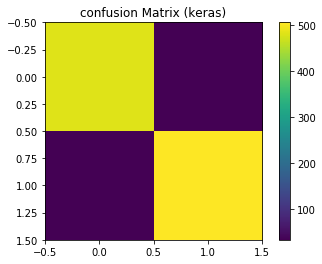

In [35]:
yThresholded = y_pred.flatten()>0.5
cm = confusion_matrix(y_test_enc,yThresholded)
plt.imshow(cm)
plt.colorbar()
plt.title('confusion Matrix')
plt.show()

In [36]:
cm

array([[482,  34],
       [ 35, 505]])

In [45]:
tn, fp, fn, tp = confusion_matrix(y_test_enc,yThresholded).ravel()

In [37]:
m.save('model.hdf5')

# Measure Performance
Prediction of a single frame (without feature computation)

In [38]:
testframe = np.array([x_train_reduced[1,:]])

In [39]:
%%timeit
m.predict(testframe)

727 µs ± 68.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
